In [2]:
from sklearn.impute import SimpleImputer

import os
import pandas as pd
import numpy as np
import random
import pickle
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn import neighbors, datasets
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier

from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, \
                            silhouette_score, recall_score, precision_score, make_scorer, \
                            roc_auc_score, f1_score, precision_recall_curve

import scikitplot as skplt
import matplotlib.pyplot as plt

In [3]:
loan_training_set4 = pd.read_csv('Loan_training_set_4_4.csv', sep = ',' , skiprows=1, skipfooter=2, engine = "python")
loan_training_set3 = pd.read_csv('Loan_training_set_3_4.csv', sep = ',' , skiprows=1, skipfooter=2, engine = "python")
loan_training_set2 = pd.read_csv('Loan_training_set_2_4.csv', sep = ',' , skiprows=1, skipfooter=2, engine = "python")
loan_training_set1 = pd.read_csv('Loan_training_set_1_4.csv', sep = ',' , skiprows=1, skipfooter=2, engine = "python")
frames = [loan_training_set1, loan_training_set2, loan_training_set3,loan_training_set4]
total_lendingclub = pd.concat(frames)

In [4]:
df = total_lendingclub.loc[:, loan_training_set1.columns.isin(["loan_status", "annual_inc",
"annual_inc_joint",
"application_type",
"dti",
"dti_joint",
"emp_length",
"grade",
"home_ownership",
"loan_amnt",
"mort_acc",
"open_act_il",
"open_rv_12m",
"pct_tl_nvr_dlq",
"pub_rec",
"pub_rec_bankruptcies",
"purpose",
"term",
"tot_coll_amt"
"tot_cur_bal",
"total_acc",
"int_rate"
])]



In [5]:
df = df[df["loan_status"]!="Current"]

# Variables Numéricas

In [6]:
int_numeric = df["int_rate"].str.strip("%")
int_numeric = pd.to_numeric(int_numeric)
df["int_rate"] = int_numeric

In [7]:
from sklearn.impute import SimpleImputer

numericas = df.select_dtypes(exclude=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [8]:
numericas_df = df.select_dtypes(exclude=['object'])

In [9]:
numericas_df

,loan_amnt,int_rate,annual_inc,dti,pub_rec,total_acc,annual_inc_joint,dti_joint,open_act_il,open_rv_12m,mort_acc,pct_tl_nvr_dlq,pub_rec_bankruptcies
8,11575,7.35,153000.0,16.99,1,46,NaN,NaN,1.0,2.0,2,95.7,1
10,7200,24.85,50000.0,6.07,0,5,NaN,NaN,1.0,0.0,0,80.0,0
24,7500,7.35,110000.0,13.12,0,27,NaN,NaN,4.0,1.0,4,100.0,0
42,10000,16.02,51979.0,10.11,2,21,NaN,NaN,1.0,2.0,0,100.0,2
91,14000,16.02,75000.0,10.86,0,10,NaN,NaN,2.0,2.0,1,90.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421088,11575,15.59,25400.0,27.08,0,18,NaN,NaN,NaN,NaN,0,100.0,0
421089,12000,11.99,63000.0,23.69,0,61,NaN,NaN,NaN,NaN,1,98.3,0
421092,13000,15.99,35000.0,30.90,1,22,NaN,NaN,NaN,NaN,0,100.0,1
421093,12000,19.99,64400.0,27.19,0,20,NaN,NaN,NaN,NaN,0,95.0,0


# Variables Categóricas

In [10]:
from sklearn.preprocessing import OneHotEncoder

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


In [11]:
categoricas = df.select_dtypes(include=['object']).drop(['loan_status'], axis=1).columns

categoricas

Index(['term', 'grade', 'emp_length', 'home_ownership', 'purpose',
       'application_type'],
      dtype='object')

In [12]:
categoricas_df = df.select_dtypes(include=['object']).drop(['loan_status'], axis=1)

In [13]:
categoricas_df

,term,grade,emp_length,home_ownership,purpose,application_type
8,36 months,A,6 years,OWN,credit_card,Individual
10,36 months,E,2 years,RENT,debt_consolidation,Individual
24,36 months,A,7 years,MORTGAGE,debt_consolidation,Individual
42,60 months,C,7 years,RENT,debt_consolidation,Individual
91,36 months,C,7 years,MORTGAGE,debt_consolidation,Individual
...,...,...,...,...,...,...
421088,36 months,D,10+ years,RENT,credit_card,Individual
421089,36 months,B,< 1 year,MORTGAGE,credit_card,Individual
421092,60 months,D,5 years,RENT,debt_consolidation,Individual
421093,60 months,E,1 year,RENT,debt_consolidation,Individual


# Concatenación

In [14]:
loan_status = pd.DataFrame(df['loan_status'])

In [15]:
lendingclub = pd.concat([numericas_df, loan_status, categoricas_df],  axis=1)

In [16]:
from sklearn.compose import ColumnTransformer


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numericas),
        ('cat', categorical_transformer, categoricas)])

In [17]:
lendingclub['loan_status'].mask(lendingclub['loan_status'] == 'Fully Paid', 1, inplace=True)
lendingclub['loan_status'].mask(lendingclub['loan_status'] != 1, 0, inplace=True)
lendingclub

,loan_amnt,int_rate,annual_inc,dti,pub_rec,total_acc,annual_inc_joint,dti_joint,open_act_il,open_rv_12m,mort_acc,pct_tl_nvr_dlq,pub_rec_bankruptcies,loan_status,term,grade,emp_length,home_ownership,purpose,application_type
8,11575,7.35,153000.0,16.99,1,46,NaN,NaN,1.0,2.0,2,95.7,1,1,36 months,A,6 years,OWN,credit_card,Individual
10,7200,24.85,50000.0,6.07,0,5,NaN,NaN,1.0,0.0,0,80.0,0,1,36 months,E,2 years,RENT,debt_consolidation,Individual
24,7500,7.35,110000.0,13.12,0,27,NaN,NaN,4.0,1.0,4,100.0,0,1,36 months,A,7 years,MORTGAGE,debt_consolidation,Individual
42,10000,16.02,51979.0,10.11,2,21,NaN,NaN,1.0,2.0,0,100.0,2,1,60 months,C,7 years,RENT,debt_consolidation,Individual
91,14000,16.02,75000.0,10.86,0,10,NaN,NaN,2.0,2.0,1,90.0,0,1,36 months,C,7 years,MORTGAGE,debt_consolidation,Individual
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421088,11575,15.59,25400.0,27.08,0,18,NaN,NaN,NaN,NaN,0,100.0,0,1,36 months,D,10+ years,RENT,credit_card,Individual
421089,12000,11.99,63000.0,23.69,0,61,NaN,NaN,NaN,NaN,1,98.3,0,0,36 months,B,< 1 year,MORTGAGE,credit_card,Individual
421092,13000,15.99,35000.0,30.90,1,22,NaN,NaN,NaN,NaN,0,100.0,1,0,60 months,D,5 years,RENT,debt_consolidation,Individual
421093,12000,19.99,64400.0,27.19,0,20,NaN,NaN,NaN,NaN,0,95.0,0,0,60 months,E,1 year,RENT,debt_consolidation,Individual


# KNN

El Nearest Neighbors es un tipo de aprendizaje basado en instancias o aprendizaje no generalizado : no intenta construir un modelo interno general, sino que simplemente almacena instancias de los datos de entrenamiento. La clasificación se calcula a partir de un voto de mayoría simple de los vecinos más cercanos de cada punto: a un punto de consulta se le asigna la clase de datos que tiene más representantes dentro de los vecinos más cercanos del punto

In [18]:
from sklearn.model_selection import train_test_split
a =lendingclub.sample(n=50000, random_state=1234)


X = a.drop('loan_status', axis=1)
y = a['loan_status']


y = y.astype("int")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [19]:
from sklearn.neighbors import KNeighborsClassifier


knn = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', neighbors.KNeighborsClassifier())])

In [20]:
knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'pub_rec', 'total_acc',
       'annual_inc_joint', 'dti_joint', 'open_act_il', 'open_rv_12m',
       'mort_acc', 'pct_tl_nvr_dlq', 'pub_rec_bankruptcies'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                            

In [21]:
y_pred = knn.predict(X_test)

In [22]:
print('Accuracy: %.4f'%accuracy_score(y_test, y_pred))
print('AUC: %.4f'%roc_auc_score(y_test, y_pred))
print('F1-Score: %.4f'%f1_score(y_test, y_pred))

print('\nClassification Report                       : ')
print(classification_report(y_test, y_pred))


Accuracy: 0.7158
AUC: 0.5599
F1-Score: 0.8216

Classification Report                       : 
              precision    recall  f1-score   support

           0       0.41      0.24      0.30      4254
           1       0.77      0.88      0.82     12246

    accuracy                           0.72     16500
   macro avg       0.59      0.56      0.56     16500
weighted avg       0.68      0.72      0.69     16500



In [23]:
# Save to file in the current working directory
knn_pkl = "Knn_2.pkl"
with open(knn_pkl, 'wb') as file:
    pickle.dump(knn, file)

# Tune

In [28]:
from sklearn.model_selection import train_test_split
a =lendingclub.sample(n=10000, random_state=1234)


X = a.drop('loan_status', axis=1)
y = a['loan_status']


y = y.astype("int")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [29]:
parameters = {'classifier__n_neighbors':[4,5,6],
              'classifier__leaf_size':[1,3,5],
              'classifier__algorithm':['auto', 'kd_tree']}
from sklearn.model_selection import GridSearchCV
CV = GridSearchCV(knn, parameters, n_jobs= 3,verbose=3)
                  
CV.fit(X_train, y_train)  
print(CV.best_params_)    
print(CV.best_score_)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  26 tasks      | elapsed:   28.7s
[Parallel(n_jobs=3)]: Done  90 out of  90 | elapsed:  1.7min finished


{'classifier__algorithm': 'auto', 'classifier__leaf_size': 1, 'classifier__n_neighbors': 5}
0.717910447761194


In [31]:
knn = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', neighbors.KNeighborsClassifier(algorithm = 'auto', leaf_size = 1, n_neighbors = 5))])

In [32]:
knn.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'pub_rec', 'total_acc',
       'annual_inc_joint', 'dti_joint', 'open_act_il', 'open_rv_12m',
       'mort_acc', 'pct_tl_nvr_dlq', 'pub_rec_bankruptcies'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                            

In [33]:
y_pred = knn.predict(X_test)

# SCORING MODELO FINAL

In [34]:
print('Accuracy: %.4f'%accuracy_score(y_test, y_pred))
print('AUC: %.4f'%roc_auc_score(y_test, y_pred))
print('F1-Score: %.4f'%f1_score(y_test, y_pred))

print('\nClassification Report                       : ')
print(classification_report(y_test, y_pred))


Accuracy: 0.7273
AUC: 0.5655
F1-Score: 0.8303

Classification Report                       : 
              precision    recall  f1-score   support

           0       0.43      0.24      0.31       832
           1       0.78      0.89      0.83      2468

    accuracy                           0.73      3300
   macro avg       0.60      0.57      0.57      3300
weighted avg       0.69      0.73      0.70      3300



In [36]:
# Save to file in the current working directory
knn_pkl = "knn.pkl"
with open(knn_pkl, 'wb') as file:
    pickle.dump(knn, file)

# PLOTING

### Matriz de confusión no estandarizada y estandarizada

Confusion matrix, without normalization
[[ 199  633]
 [ 267 2201]]
Normalized confusion matrix
[[0.23918269 0.76081731]
 [0.10818476 0.89181524]]


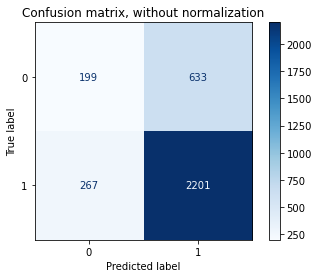

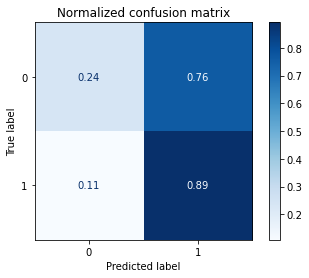

In [37]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(knn, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


In [40]:
prob_predictions = knn.predict_proba(X_test)

### Curva ROC

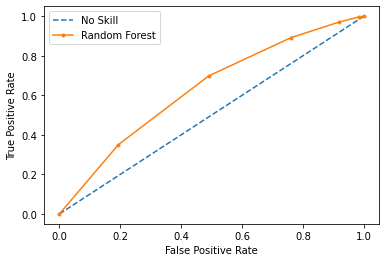

In [41]:
# keep probabilities for the positive outcome only
yhat = prob_predictions[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Random Forest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [42]:
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))

In [43]:
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.800000, G-Mean=0.596


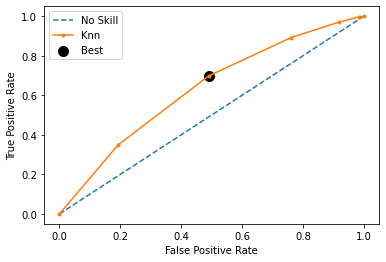

In [49]:
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Knn')
plt.scatter(fpr[ix], tpr[ix], s=100, marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [45]:
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_test, yhat)

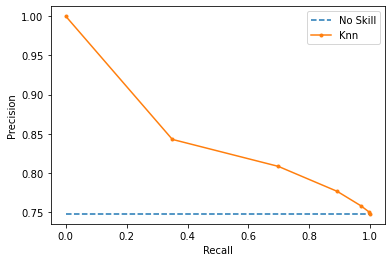

In [48]:
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Knn')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

### Curva de ganancia acumulada

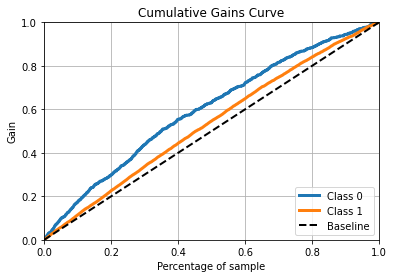

In [47]:
skplt.metrics.plot_cumulative_gain(y_test, prob_predictions)
plt.show()